In [1]:
from new_struct.well import Well
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
outer_bound = "nnnn"
top_bound = "imp"
bottom_bound = 'imp'
wtype = 'frac'
nseg = 20
nwells = 1
Xe = 1000
Ye = 1000
Xf = 100
xw = Xe/2
yw = Ye/2
xwds = [xw/Xf]
ywds = [yw/Xf]
xed = Xe/Xf
yed = Ye/Xf
Fcd = 10
k = 10
h = 10
ct = 1e-5
mu = 1
B = 1
fi = 0.1
Q = 100
ts = np.logspace(-2,3, 100)
CT = 0.00036*k/(fi*mu*ct*Xf*Xf)
CP = Q*18.42*mu*B/(k*h)
tds = ts*CT
well = Well(outer_bound, top_bound, bottom_bound, wtype, nseg, nwells, xwds, ywds, xed=xed, yed=yed, attrs={'Fcd': Fcd})

In [3]:
pds = []
for td in tds:
    pds.append(well.pw(td))
pds = np.array(pds)

In [4]:
import pandas as pd

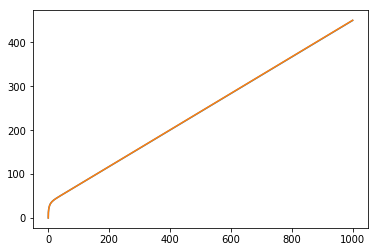

In [5]:
from fwell.fwell import FWell
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

outer_bound = "nnnn"
top_bound = "imp"
bottom_bound = 'imp'
wtype = 'frac'
nseg = 20
nwells = 1
Xe = 1000
Ye = 1000
Xf = 100
xw = Xe/2
yw = Ye/2
xwds = [xw/Xf]
ywds = [yw/Xf]
xed = Xe/Xf
yed = Ye/Xf
Fcd = 10
k = 10
h = 10
ct = 1e-5
mu = 1
B = 1
fi = 0.1
Q = 100
ts = np.logspace(-2,3, 100)
CT = 0.00036*k/(fi*mu*ct*Xf*Xf)
CP = Q*18.42*mu*B/(k*h)
tds = ts*CT
fwell = FWell(outer_bound, top_bound, bottom_bound, wtype, nseg, nwells, xwds, ywds, xed=xed, yed=yed, attrs={'Fcd': Fcd})
fpds = []
df = pd.read_csv('./saphire/test2.txt', delim_whitespace=True, skiprows = 1)
t_saph = np.array(df["(hr)"])
p_saph = np.array(df["(atm)"])
for t in t_saph:
    if t == 0:
        fpds.append(0)
    else:
        fpds.append(fwell.pw(t*CT))
fpds = np.array(fpds)
dp_saph = np.abs(p_saph-p_saph[0])
plt.plot(t_saph, dp_saph)
plt.plot(t_saph,CP*fpds)

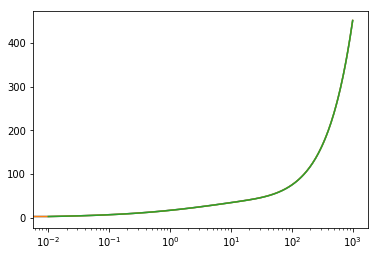

In [7]:
plt.xscale('log')
plt.plot(t_saph, dp_saph)
plt.plot(t_saph,CP*fpds)
plt.plot(ts, CP*pds)

## Check multifrac

In [54]:
df_chen = pd.read_csv("./saphire/ref data/chen_multifrac_rect.csv", skiprows=1, sep=";")

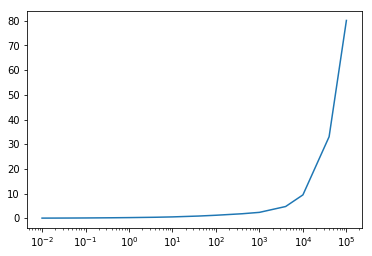

In [60]:
plt.xscale("log")
plt.plot(df_chen["td"], df_chen["pwd"])

In [62]:
nwells = 5
xed = 100
yed = 80
xc = xed/2
yc = yed/2
dyd=20
Fcd=100
xwds = [xc,xc,xc,xc,xc]
ywds = [yc-2*dyd, yc-dyd, yc, yc+dyd, yc+2*dyd]
fwell = FWell(outer_bound, top_bound, bottom_bound, wtype, nseg, nwells, xwds, ywds, xed=xed, yed=yed, attrs={'Fcd': Fcd})

In [69]:
pd_chen = []
for td in df_chen["td"]:
    if td <=1e+1:
        pd_chen.append(fwell.pw(td))

KeyboardInterrupt: 

In [70]:
pd_chen

[]